In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## Análisis Exploratorio

In [ ]:
# Variable classification
train_data = pd.read_csv('./train.csv', encoding = "ISO-8859-1")
test_data = pd.read_csv('./test.csv', encoding = "ISO-8859-1")
variables = pd.read_csv('./variables.txt', encoding = "ISO-8859-1")
quant_vars = list(variables.loc[(variables['Clasification'] == 'Cuantitativa')]['Variable'].values)
quali_vars = list(variables.loc[(variables['Clasification'] == 'Cualitativa')]['Variable'].values)[1:]

### Análisis de variables numéricas

In [ ]:
train_data[quant_vars].dropna().describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,...,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,70.030126,9953.560669,102.703766,425.752301,43.191632,589.180753,1058.124686,1157.647699,346.349791,6.654393,...,1.762343,471.810042,89.556485,45.584937,22.845188,3.141423,15.103766,2.753138,25.618410,180444.014226
std,24.289276,7941.382527,185.404454,463.904797,154.851036,448.798854,448.234819,386.102362,435.239519,51.483326,...,0.778966,221.391454,120.490834,65.778002,61.793439,28.846488,56.116452,38.962166,190.250285,83171.435908
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7417.500000,0.000000,0.000000,0.000000,245.000000,783.500000,875.500000,0.000000,0.000000,...,1.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,127500.000000
50%,69.000000,9250.000000,0.000000,351.000000,0.000000,506.000000,988.000000,1080.000000,0.000000,0.000000,...,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159000.000000
75%,80.000000,11248.500000,160.000000,689.500000,0.000000,833.000000,1307.500000,1383.000000,727.500000,0.000000,...,2.000000,578.000000,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,213495.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,3500.000000,755000.000000


In [ ]:
profile_quant = ProfileReport(train_data[quant_vars], minimal = True, title="Houses Data Report")
#profile.to_file(output_file='output.html')

In [ ]:
profile_quant

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Correlación variables númericas

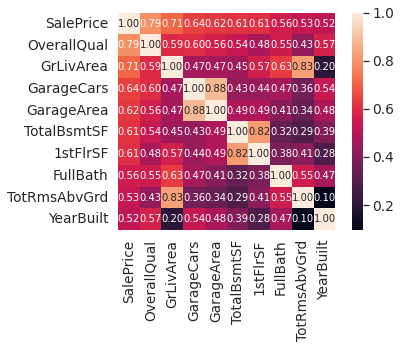

In [ ]:
k = 10 #Variables for heatmap
corrmat = train_data.corr()
cols = corrmat.nlargest
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Variables Categóricas

In [ ]:
train_data[quali_vars].describe()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000
mean,56.897260,6.099315,5.575342,1971.267808,1984.865753,1978.506164,6.321918,2007.815753
std,42.300571,1.382997,1.112799,30.202904,20.645407,24.689725,2.703626,1.328095
min,20.000000,1.000000,1.000000,1872.000000,1950.000000,1900.000000,1.000000,2006.000000
25%,20.000000,5.000000,5.000000,1954.000000,1967.000000,1961.000000,5.000000,2007.000000
50%,50.000000,6.000000,5.000000,1973.000000,1994.000000,1980.000000,6.000000,2008.000000
75%,70.000000,7.000000,6.000000,2000.000000,2004.000000,2002.000000,8.000000,2009.000000
max,190.000000,10.000000,9.000000,2010.000000,2010.000000,2010.000000,12.000000,2010.000000


In [ ]:
profile_quali = ProfileReport(train_data[quali_vars], minimal = True, title="Houses Data Report")
#profile.to_file(output_file='output.html')

In [ ]:
profile_quali

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Análisis de componentes principales (PCA)

### Test de Esfericidad de Bartlett

HO: La matriz de correlación es igual a la matriz identidad

In [ ]:
chi_cuadrado, p_valor = calculate_bartlett_sphericity(train_data[cols.values])
chi_cuadrado, p_valor

(11975.248109175202, 0.0)

Como p-value &lt; 0.05 rechazamos la hipótesis nula, por lo que hay correlación entre las variables

### Índice KMO

In [ ]:
kmo, kmo_modelo = calculate_kmo(train_data[cols.values])
kmo_modelo

0.8354879828700892

El índice se encuentra en un rango entre 0.8 y 0.9, por lo que la adecuación muestral para un análisis factorial es muy buena. Este dato indica que probablemente se podrán obtener buenos resultados haciendo PCA.

### Modelo PCA

In [ ]:
pca_pipe = make_pipeline(StandardScaler(),PCA()) #Se escalan los datos y luego se le aplica PCA
pca_pipe.fit(train_data[cols.values])
#Se extrae el modelo del pipeline
modelo_pca = pca_pipe.named_steps['pca']

#Se convierte el arreglo en data frame
pd.DataFrame(
    data = modelo_pca.components_,
    columns = train_data[cols.values].columns,
    index = ['PC1','PC2','PC3','PC5','PC6','PC7','PC8', 'PC9', 'PC10', 'PC11']
)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
PC1,0.375540,0.347171,0.334763,0.330498,0.325335,0.301166,0.308232,0.298229,0.271015,0.251409
PC2,-0.000575,-0.099998,0.457616,-0.294047,-0.289965,-0.108410,0.058913,0.180974,0.573056,-0.483400
PC3,0.004714,-0.111730,-0.053345,-0.203113,-0.083921,0.606500,0.589556,-0.365604,-0.162239,-0.246871
PC5,-0.097706,-0.252636,0.060804,0.479676,0.560901,-0.151944,-0.016265,-0.350197,0.129060,-0.464313
PC6,0.419785,0.587173,0.095562,-0.101950,-0.106111,-0.091964,-0.268119,-0.588103,-0.008493,-0.148126
PC7,0.045909,0.336125,-0.064189,0.041836,0.054456,-0.017757,0.012406,0.497597,-0.512601,-0.604355
PC8,-0.716143,0.515127,-0.163940,0.068441,0.022442,0.280111,-0.118384,-0.024529,0.308727,-0.036442
PC9,-0.225833,0.255977,0.069010,0.022800,-0.061300,-0.634169,0.661666,-0.118274,-0.081311,0.117738
PC10,-0.302687,-0.006051,0.702063,-0.325445,0.324649,0.065685,-0.158760,-0.081661,-0.379332,0.155115
PC11,-0.124873,-0.067048,0.366327,0.640079,-0.603772,0.113566,-0.067965,-0.085306,-0.215711,0.012215


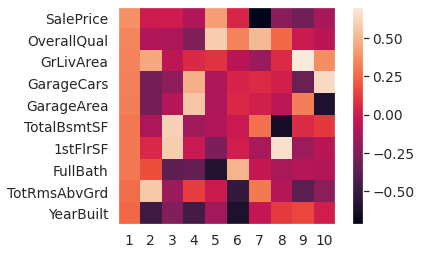

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
componentes = modelo_pca.components_
plt.imshow(componentes.T)
plt.yticks(range(len(train_data[cols.values].columns)), train_data[cols.values].columns)
plt.xticks(range(len(train_data[cols.values].columns)), np.arange(modelo_pca.n_components_)+1)
plt.grid(False)
plt.colorbar();

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706.0,NaN,150.0,856.0,856,854.0,NaN,...,2.0,548.0,NaN,61.0,NaN,NaN,NaN,NaN,NaN,208500
1,80.0,9600,NaN,978.0,NaN,284.0,1262.0,1262,NaN,NaN,...,2.0,460.0,298.0,NaN,NaN,NaN,NaN,NaN,NaN,181500
2,68.0,11250,162.0,486.0,NaN,434.0,920.0,920,866.0,NaN,...,2.0,608.0,NaN,42.0,NaN,NaN,NaN,NaN,NaN,223500
3,60.0,9550,NaN,216.0,NaN,540.0,756.0,961,756.0,NaN,...,3.0,642.0,NaN,35.0,272.0,NaN,NaN,NaN,NaN,140000
4,84.0,14260,350.0,655.0,NaN,490.0,1145.0,1145,1053.0,NaN,...,3.0,836.0,192.0,84.0,NaN,NaN,NaN,NaN,NaN,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,NaN,NaN,NaN,953.0,953.0,953,694.0,NaN,...,2.0,460.0,NaN,40.0,NaN,NaN,NaN,NaN,NaN,175000
1456,85.0,13175,119.0,790.0,163.0,589.0,1542.0,2073,NaN,NaN,...,2.0,500.0,349.0,NaN,NaN,NaN,NaN,NaN,NaN,210000
1457,66.0,9042,NaN,275.0,NaN,877.0,1152.0,1188,1152.0,NaN,...,1.0,252.0,NaN,60.0,NaN,NaN,NaN,NaN,2500.0,266500
1458,68.0,9717,NaN,49.0,1029.0,NaN,1078.0,1078,NaN,NaN,...,1.0,240.0,366.0,NaN,112.0,NaN,NaN,NaN,NaN,142125


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0c1bb84e-27cf-47ba-ade1-cf73acbd4bfe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>